In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion() #Turn interactive mode on.


#MNIST Dataset
trainset = torchvision.datasets.MNIST(root='./mnist_data', train=True,download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./mnist_data/', train=False,download=False, transform=transforms.ToTensor())


#DataLoaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    

In [2]:
idx=torch.LongTensor(1).random_(0, 59999).item()
idx

5977

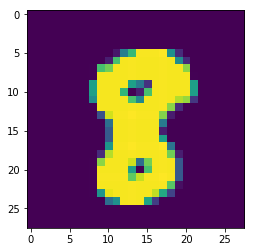

In [3]:


sample=trainset[idx][0][0]
plt.imshow(sample)


In [4]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 520)
        self.fc2 = nn.Linear(520, 320)
        self.fc3 = nn.Linear(320, 240)
        self.fc4 = nn.Linear(240, 120)
        self.fc5 = nn.Linear(120, 10)
    
    def forward(self, x):    
        x = x.view(-1, 784 )
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x                        

net = Net()
if torch.cuda.is_available():
    net = net.cuda()


In [5]:
#Printing the parameter values
params = list(net.parameters())
for name, param in net.named_parameters():
    print(name, param.shape) 

fc1.weight torch.Size([520, 784])
fc1.bias torch.Size([520])
fc2.weight torch.Size([320, 520])
fc2.bias torch.Size([320])
fc3.weight torch.Size([240, 320])
fc3.bias torch.Size([240])
fc4.weight torch.Size([120, 240])
fc4.bias torch.Size([120])
fc5.weight torch.Size([10, 120])
fc5.bias torch.Size([10])


In [6]:
criterion = nn.CrossEntropyLoss()
print(criterion)
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)


CrossEntropyLoss()


In [7]:
def train(epoch, trainloader, optimizer, criterion):
    running_loss = 0.0
    
    for i, data in enumerate(tqdm(trainloader), 0):
        inputs, labels = data
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('epoch %d training loss: %.3f' %
            (epoch + 1, running_loss / (len(trainloader))))
    return running_loss / (len(trainloader))   


########################################################################
# Let us look at how the network performs on the test dataset.

def test(testloader, model):
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            # get the inputs
            inputs, labels = data
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)

            # addup loss
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%, loss = %f' % (
                                    100 * correct / total, running_loss / len(testloader)))
    return running_loss / len(testloader)




In [8]:
import os
from tqdm import tqdm
print('Start Training')
if not os.path.exists('./models'):
    os.mkdir('./models')

training_losses = []
testing_losses = []
num_epochs = 10


for epoch in range(num_epochs):  # loop over the dataset multiple times
    print('epoch ', epoch + 1)
    train_loss = train(epoch, trainloader, optimizer, criterion)
    test_loss = test(testloader, net)
   
    training_losses.append(train_loss)
    testing_losses.append(test_loss)

print('Finished Training')


  0%|          | 0/938 [00:00<?, ?it/s]

Start Training
epoch  1


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 1 training loss: 0.845


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 94 %, loss = 0.202308
epoch  2


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 2 training loss: 0.164


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 96 %, loss = 0.119358
epoch  3


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 3 training loss: 0.103


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 96 %, loss = 0.094280
epoch  4


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 4 training loss: 0.078


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.086635
epoch  5


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 5 training loss: 0.060


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.081006
epoch  6


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 6 training loss: 0.048


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.079879
epoch  7


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 7 training loss: 0.037


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.075476
epoch  8


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 8 training loss: 0.032


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.078144
epoch  9


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 9 training loss: 0.027


  0%|          | 0/938 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.073663
epoch  10


  0%|          | 0/157 [00:00<?, ?it/s]

epoch 10 training loss: 0.023


100%|██████████| 157/157 [00:00<00:00, 373.42it/s]

Accuracy of the network on the 10000 test images: 97 %, loss = 0.074167
Finished Training
